
Aim-In this project we will look into medical image processing:
  -introduction to Hounsfield scale<br>
  -ct data visualisation:level and window<br>
  -Binarise image using image thresholding<br>
  -basics of contour<br>
  -histogram equalisation<br>
  -creating masks/applying masks<br>
  -applying median and gaussian filter<br> 
  -and edge detection


In [1]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.9 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import tensorflow as tf
import cv2
import os
from skimage import io
import nibabel as nib
from skimage.color import rgb2gray

In [3]:
!pip install tensorflow_io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 42.8 MB/s eta 0:00:00


In [4]:
import tensorflow_io as tfio
import numpy as np

import cv2

import os

import matplotlib.pyplot as plt


In [5]:
!pip install dicom


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.3/766.3 kB 12.0 MB/s eta 0:00:00


In [6]:
import dicom

/usr/local/lib/python3.10/dist-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [7]:
image_bytes = tf.io.read_file('117 (1).dcm')
image1=pydicom.read_file('117 (1).dcm')
print(image1)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.60705886171073935727158381627446732403
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0018) SOP Instance UID                    UI: 2.25.60705886171073935727158381627446732403
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) 

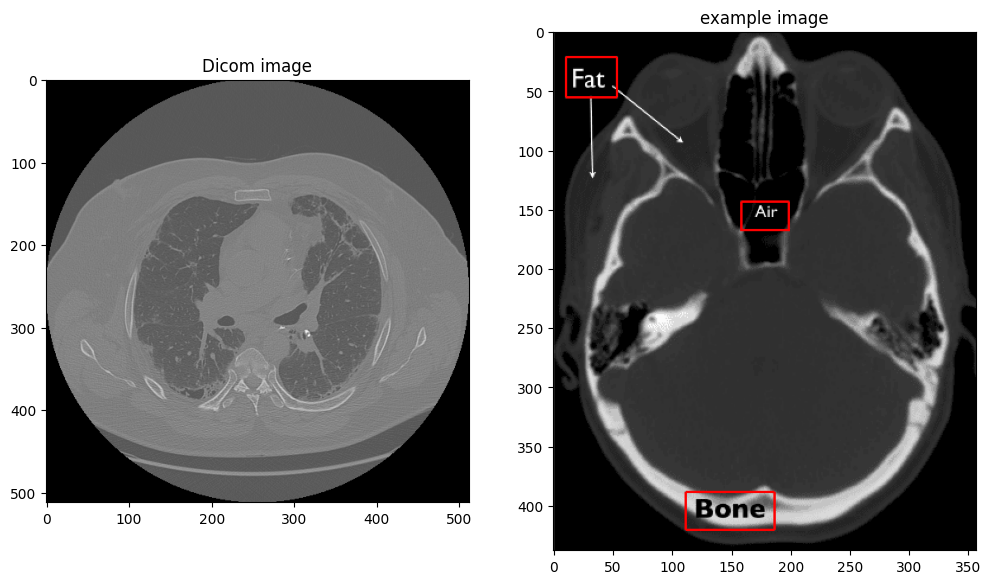

In [8]:
image = image1.pixel_array
eg= io.imread('ct-image-example.png')
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Dicom image")
plt.imshow(image,cmap='gray')
plt.subplot(1,2,2)
plt.title("example image")
plt.imshow(eg,cmap='gray')

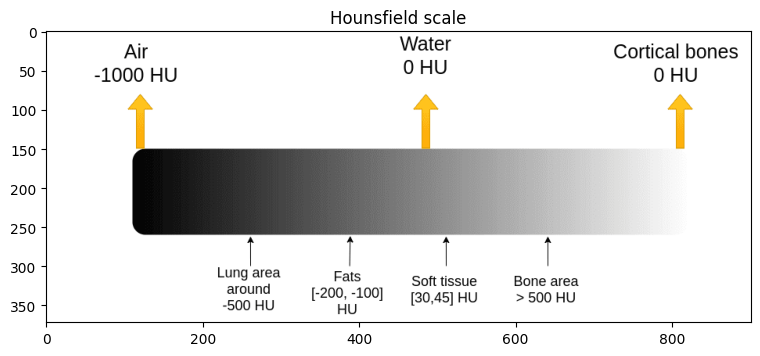

In [9]:
scale = io.imread('ct-Hounsfield-scale.png')
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Hounsfield scale")
plt.imshow(scale,cmap='gray')

In [10]:
def transform_to_hu(dicom_image, image):
    intercept = dicom_image.RescaleIntercept
    slope = dicom_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

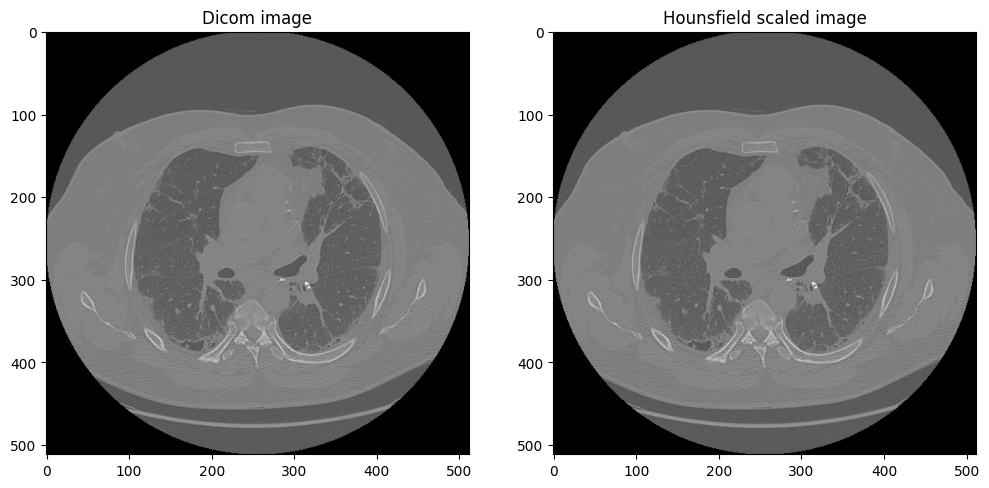

In [11]:
image2 = transform_to_hu(image1,image) 
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Dicom image")
plt.imshow(image,cmap='gray')
plt.subplot(1,2,2)
plt.title("Hounsfield scaled image")
plt.imshow(image2,cmap='gray')

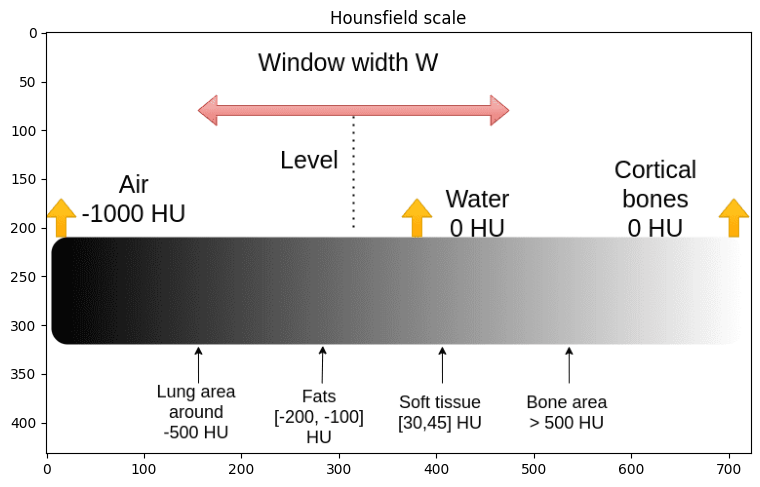

In [12]:
wind = io.imread('hounsfield-window.png')
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Hounsfield scale")
plt.imshow(wind,cmap='gray')

In [13]:
def show_slice_window(slice, level, window):
   """
   Function to display an image slice
   Input is a numpy 2D array
   """
   max = level + window/2
   min = level - window/2
   slice = slice.clip(min,max)
   return slice

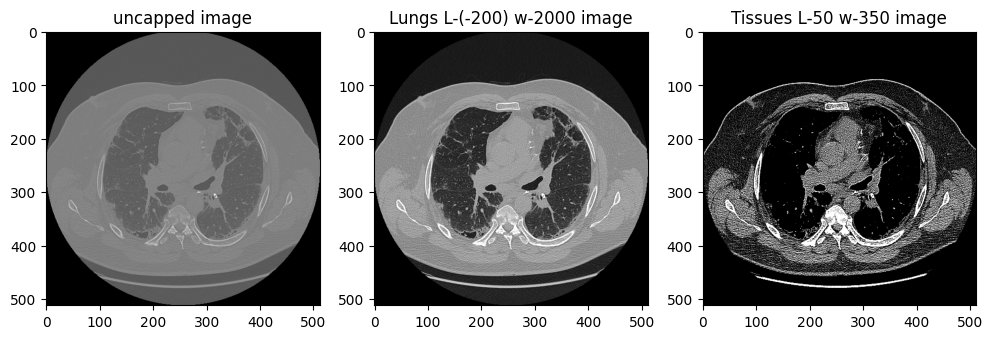

In [14]:
l_200w_2000image = show_slice_window(image2,-200,2000)
l_50w_350image = show_slice_window(image2,50,350)
plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title("uncapped image")
plt.imshow(image,cmap='gray')
plt.subplot(1,3,2)
plt.title("Lungs L-(-200) w-2000 image")
plt.imshow(l_200w_2000image,cmap='gray')
plt.subplot(1,3,3)
plt.title("Tissues L-50 w-350 image")
plt.imshow(l_50w_350image,cmap='gray')

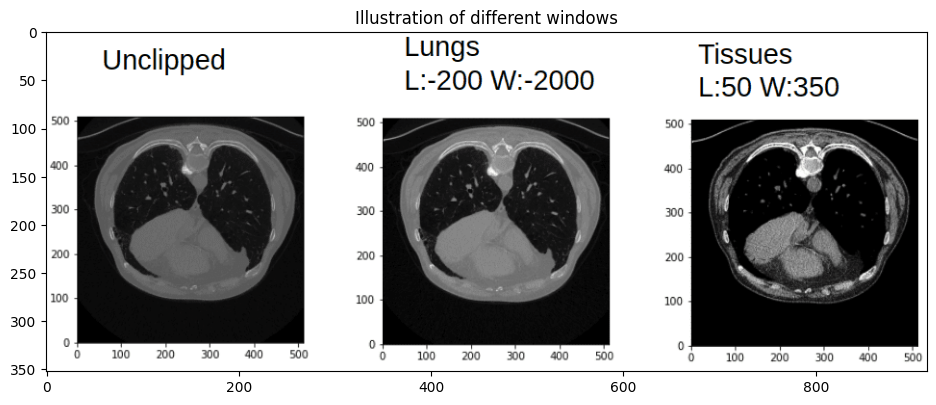

In [15]:
illust = io.imread('ct-window-and-leveling-illustration.png')
plt.figure(figsize=(25,25))
plt.subplot(1,2,1)
plt.title("Illustration of different windows")
plt.imshow(illust,cmap='gray')

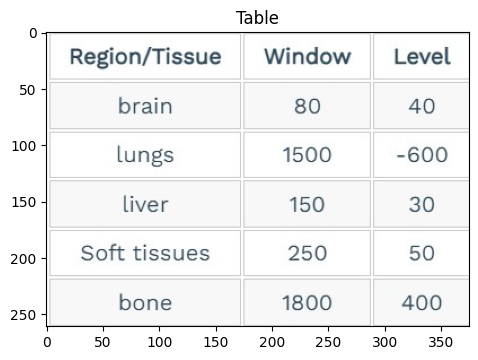

In [16]:
table = io.imread('table.jpg')
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Table")
plt.imshow(table,cmap='gray')

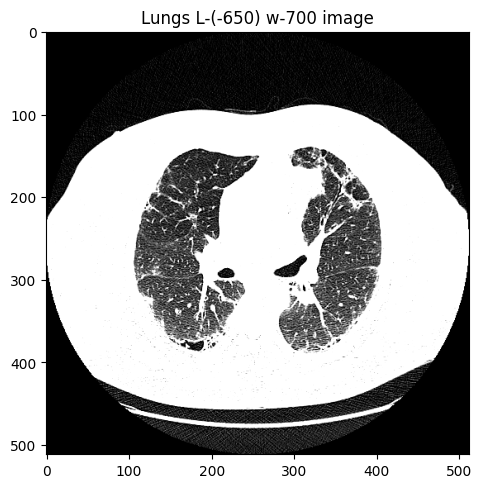

In [17]:
l_650w_700image = show_slice_window(image2,-650,700)
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("Lungs L-(-650) w-700 image")
plt.imshow(l_650w_700image,cmap='gray')

In [18]:
print(l_650w_700image.shape)
binary_slice=l_650w_700image.copy()
print(l_650w_700image[300][330])
min=np.min(np.min(l_650w_700image))
print(min)

(512, 512)
-773.0
-1000.0


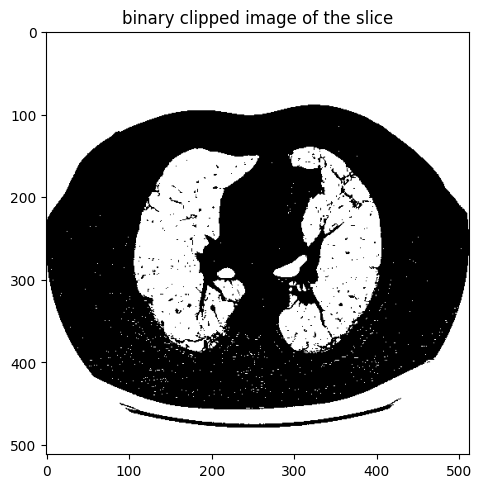

In [19]:
[row,col]=l_650w_700image.shape
for i in range (row):
  for j in range(col):
    if binary_slice[i][j]>-350:
      binary_slice[i][j]=0
    else:
      binary_slice[i][j]=1
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("binary clipped image of the slice")
plt.imshow(binary_slice,cmap='gray')

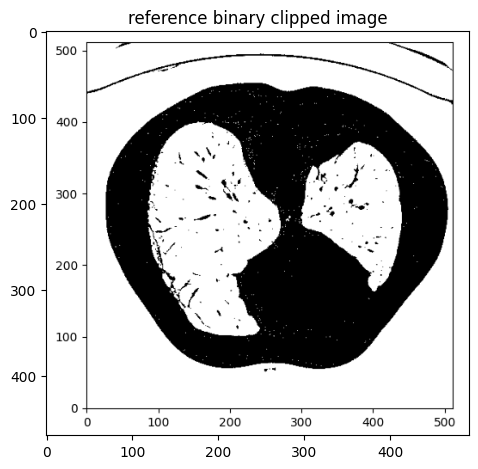

In [20]:
ref= io.imread('binary-clipped-lung-mask.png')
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title("reference binary clipped image")
plt.imshow(ref,cmap='gray')

<ipython-input-21-df018467368c>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('hand_xray.jpg')


Data type: uint8
Min value: 0
Max value: 255


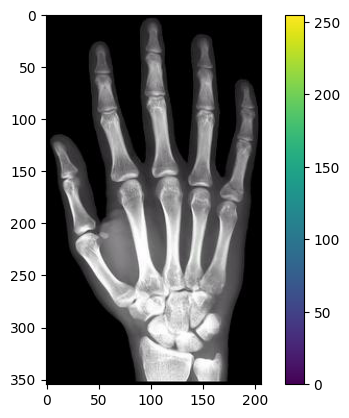

In [21]:
import imageio


im = imageio.imread('hand_xray.jpg')
print('Data type:', im.dtype)
print('Min value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, vmin=0, vmax=255);
plt.colorbar();

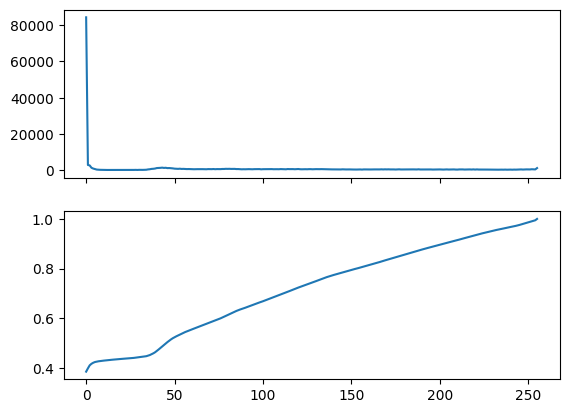

In [22]:
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min =0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
#format_and_render_plot()

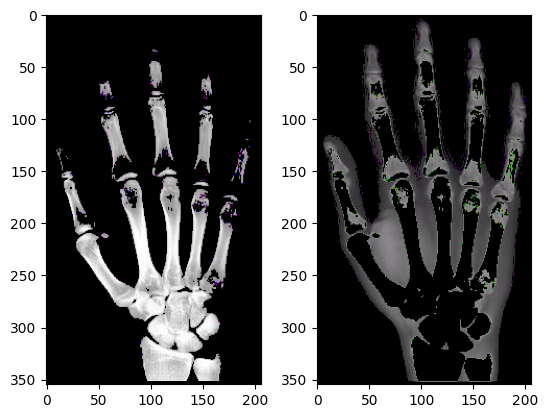

In [23]:
import scipy.ndimage as ndi

# Create skin and bone masks

#mask_bone = im >= 145
im_bone = np.where(im >= 145, im, 0)
#mask_skin = (im>=45)&(im<145)
im_skin = np.where((im>=45)&(im<145), im, 0)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(im_bone, cmap='gray')
axes[1].imshow(im_skin, cmap='gray')
#format_and_render_plot()

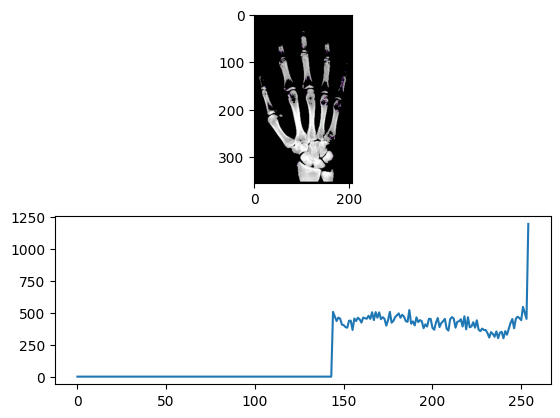

In [24]:
# Apply a mask
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi

# Screen out non-bone pixels from "im"
#mask_bone = im >= 145
im_bone = np.where(im >= 145, im, 0)

# Get the histogram of bone intensities
hist = ndi.histogram(im_bone, 1, 255, 255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_bone)
axes[1].plot(hist)
#format_and_render_plot()

Data type: int16
Min. value: -2000
Max value: 3903


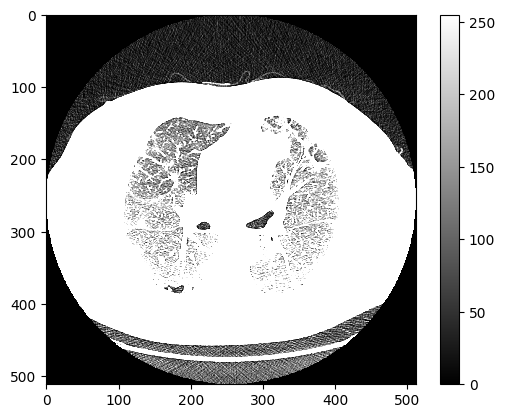

In [25]:
im=pydicom.read_file('117 (1).dcm')
im=im.pixel_array
print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im,cmap='gray', vmin=0, vmax=255)
plt.colorbar()
#format_and_render_plot()

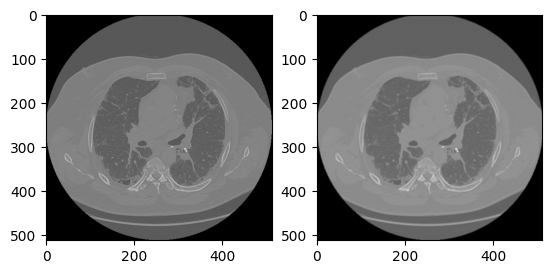

In [26]:
# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im,cmap='gray')
axes[1].imshow(im_filt,cmap='gray')
#format_and_render_plot()

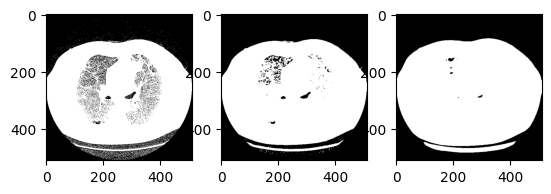

In [27]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 145,cmap='gray')
axes[1].imshow(im_s1 >= 145,cmap='gray')
axes[2].imshow(im_s3 >= 145,cmap='gray')
#format_and_render_plot()

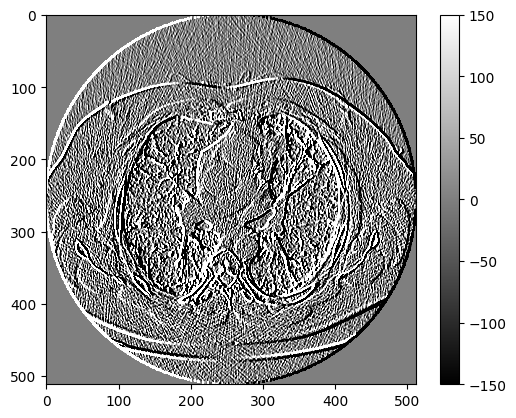

In [28]:
# Part1: Filter to Detect Edges
# Set weights to detect vertical edges
weights = [[+1, 0, -1], [+1, 0, -1], [+1, 0, -1]]


# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

# Draw the image in color
plt.imshow(edges, cmap='gray', vmin=-150, vmax=150)
plt.colorbar()
#format_and_render_plot()

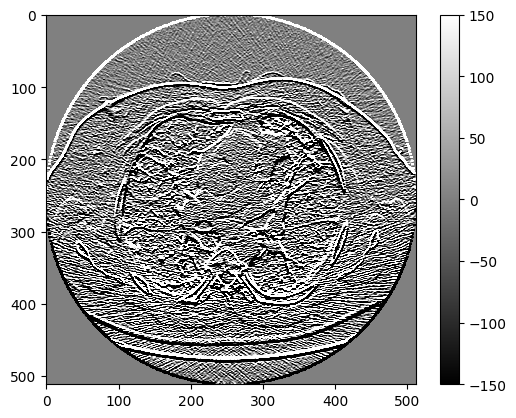

In [29]:
# Part2: Filter to Detect Edges
# Set weights to detect horizontal edges
weights = [[+1, +1, +1], [0, 0, 0], [-1, -1, -1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

# Draw the image in color
plt.imshow(edges, cmap='gray', vmin=-150, vmax=150)
plt.colorbar()
#format_and_render_plot()

Conclusion - the image gets richer as observed once we use hounsfield scale.Different windows of hounsfield scale represent different region.tissues of the human body.<br>
We expect lungs to be in the Housendfield unit range of [-1000,-300]. To this end, we need to clip the image range to [-1000,-300] and binarize the values to 0 and 1, so we will get something as observed.This image can be used to find contours.<br>
We then use histogram to summarize the distribution of intensity values in an image.Histograms bin each pixel by its value and then count each bin.<br>
Then we created a mask to restrict our analysis to only the most important parts of an image by creating and applying image masks, and we applied that mask on the image,plotting the masked image shows that only the high-intensity values remain, and these are mostly bone.<br>
We apply gaussian filter as Gaussian filter is useful for smoothing data across larger areas. It blurs activation based on a Gaussian, or normal, distribution around the filtered pixel. Basically, the filter weights dissipate in a circular pattern as you get further from the center.<br>
We then apply edge detection using vertical and horizontal filter as filters can also be used as "detectors." If a part of the image fits the weighting pattern, the returned value will be very high (or very low).In the case of edge detection, that pattern is a change in intensity along a plane. 